# **Question 2**

In [ ]:
import numpy as np
import cv2

**Importing the image**

In [ ]:
img = cv2.imread('drive/MyDrive/CinqueTerre.jpg',1)

In [ ]:
 from google.colab.patches import cv2_imshow

Our original image

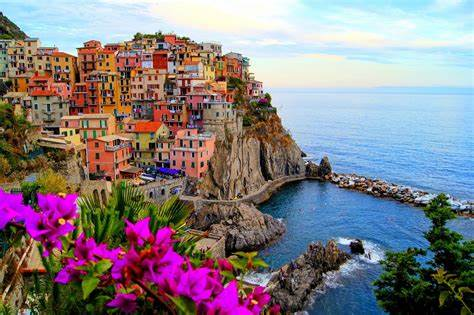

In [ ]:
cv2_imshow(img)


In [ ]:
height, width, channels = img.shape

In [ ]:
print('Height: ',height,' Width:',width,' Channels: ', channels)

Height:  315  Width: 474  Channels:  3


**The height of the image is 315 pixels and the width of the image is 474 pixels. The number of channels is 3. The size of the image is 315 x 474 i.e. 149310 pixels**

In [ ]:
print('Size: ',height*width)

Size:  149310


**Extracting the 50 x 50 pixels from the top left**

In [ ]:
subimg1 = img[0:50,0:50]

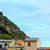

In [ ]:
cv2_imshow(subimg1)

**Extracting the 50 x 50 pixels from the bottom right**

In [ ]:
subimg2 = img[265:315,424:474]

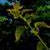

In [ ]:
cv2_imshow(subimg2)

**Defining the sum of squared differences function**

In [ ]:
def ssd(x,y):
  return np.sum((np.array(x, dtype=np.int32) - np.array(y, dtype=np.int32))**2)

In [ ]:
ssd_answer = ssd(subimg1,subimg2)

In [ ]:
print('Sum of Squared Differences: ', ssd_answer)

Sum of Squared Differences:  206008236


**The sum of squared differences between the top left 50 x 50 pixels and the bottom right 50 x 50 pixels is 206008236**

# **Question 3**

In [ ]:
img2 = cv2.imread('drive/MyDrive/monastery.jpg',0)

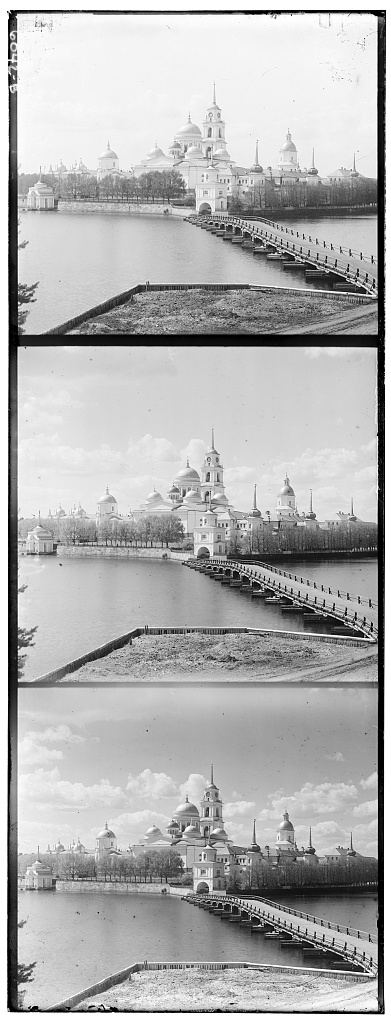

In [ ]:
cv2_imshow(img2)

In [ ]:
img2.shape

(1024, 391)

**Dividing the image into 3 parts to divide them into 3 channels. We could use a default function for this purpose, but since we have been given just one image to work with, I have done this manually so as to have best accuracy**

In [ ]:
blue_channel = img2[0:341,:]
green_channel = img2[342:683,:]
red_channel = img2[683:1024,:]

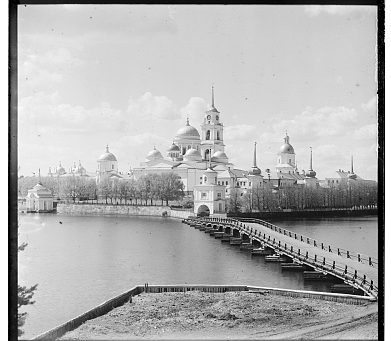

In [ ]:
cv2_imshow(green_channel)

**The im_color is the final matrix that we will output. We do all the changes in this matrix so as to leave the original matrix unchanged**

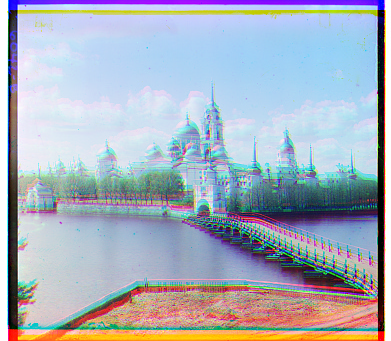

In [ ]:
im_color = np.zeros((341,391,3), dtype=np.uint8 )
im_color[:,:,0] = blue_channel
im_color[:,:,1] = green_channel
im_color[:,:,2] = red_channel
cv2_imshow(im_color)

**The above image is without any form of displacement**

**Defining the alignment function using SSD**

In [ ]:
def ssdAlign(d):
  min_ssd = 10000000000000
  ivalue=np.linspace(-20,20,39,dtype=int)
  jvalue=np.linspace(-20,30,39,dtype=int)
  for i in ivalue:
    for j in jvalue:
      ssdDiff = ssd(im_color[:,:,0],np.roll(im_color[:,:,d],[i,j],axis=(0,1)))
      if ssdDiff < min_ssd:
          min_ssd = ssdDiff
          output = (i,j)
  print(output)

**Aligning the green layer to the blue layer and the red layer to the blue layer**

In [ ]:
alignGreentoBlue = ssdAlign(1)
alignRedtoBlue = ssdAlign(2)

(-5, 0)
(10, 1)


**The green channel needs to be shifted by (-5,0) and the red channel has to be shifted by (10,1)**

In [ ]:
green_channel = np.roll(green_channel,[-5,0],axis = (0,1))
red_channel = np.roll(red_channel,[10,1],axis = (0,1))

**Setting the final matrix**

In [ ]:
im_color[:,:,1] = green_channel
im_color[:,:,2] = red_channel

**Showing the image**

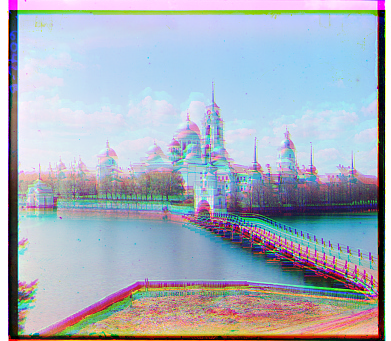

In [ ]:
cv2_imshow(im_color)

***Now we check using NCC(Normalized Cross Correlation) algorithm***

In [ ]:
def ncc(a,b):
    a=a-a.mean(axis=0)
    b=b-b.mean(axis=0)
    return np.sum(((a/np.linalg.norm(a)) * (b/np.linalg.norm(b))))

In [ ]:
def nccAlign(d):
  min_ncc = -1
  ivalue=np.linspace(-20,20,39,dtype=int)
  jvalue=np.linspace(-20,30,39,dtype=int)
  for i in ivalue:
    for j in jvalue:
      nccDiff = ncc(im_color_ncc[:,:,0],np.roll(im_color_ncc[:,:,d],[i,j],axis=(0,1)))
      if nccDiff > min_ncc:
          min_ncc = nccDiff
          output = (i,j)
  print(output)

**Resetting the channels (because they got set in the earlier algorithm)**

In [ ]:
blue_channel = img2[0:341,:]
green_channel = img2[342:683,:]
red_channel = img2[683:1024,:]

In [ ]:
im_color_ncc = np.zeros((341,391,3), dtype=np.uint8 )
im_color_ncc[:,:,0] = blue_channel
im_color_ncc[:,:,1] = green_channel
im_color_ncc[:,:,2] = red_channel

**Aligning the green channel to the blue channel and the red channel to the blue channel**

In [ ]:
alignGreentoBlue = nccAlign(1)
alignRedtoBlue = nccAlign(2)

(-2, 2)
(10, 3)


**The green channel needs to be shifted by (-2,2) and the red channel has to be shifted by (10,3)**

In [ ]:
green_channel = np.roll(green_channel,[-2,2],axis = (0,1))
red_channel = np.roll(red_channel,[10,3],axis = (0,1))

**Setting the final matrix**

In [ ]:
im_color_ncc[:,:,1] = green_channel
im_color_ncc[:,:,2] = red_channel

**Showing the image**

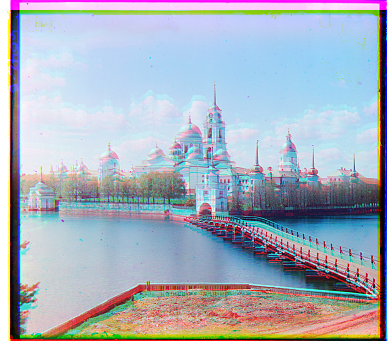

In [ ]:
cv2_imshow(im_color_ncc)

**It gives a better result than using SSD**

**Now as we can see, the images are not perfectly aligned for some reason. It might be the case that maybe the dark borders are messing with the SSD and the NCC values. Let's chop off the borders and check**

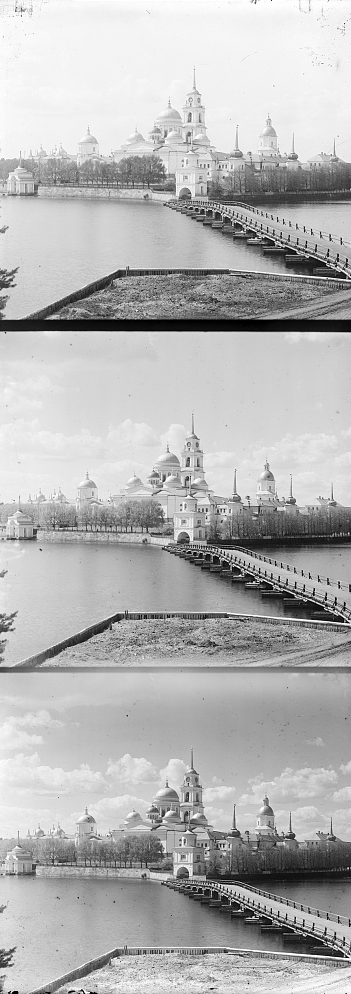

In [ ]:
cv2_imshow(img2[15:-15,20:-20])

**What we did here is that we manually cut off the borders. This process can also be automated, i.e. cutting 10% of the width and 10% of the height. However since we only have 1 image to work with, for best answer, I manually cropped the images.**

In [ ]:
img2 = img2[15:-15,20:-20]

In [ ]:
img2.shape

(994, 351)

In [ ]:
blue = img2[0:331,:]
green = img2[332:663,:]
red = img2[663:994,:]

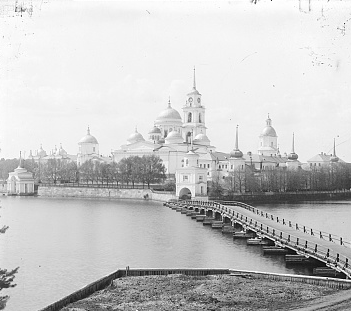

In [ ]:
cv2_imshow(blue[:-20,:])

In [ ]:
blue = blue[:-20,:]

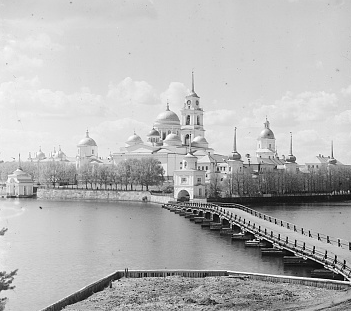

In [ ]:
cv2_imshow(green[10:-10,:])

In [ ]:
green = green[10:-10,:]

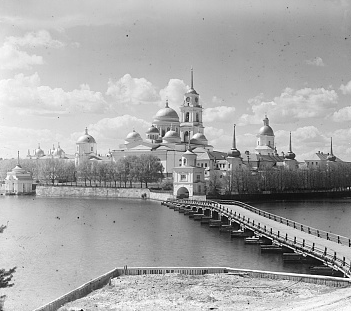

In [ ]:
cv2_imshow(red[17:-3,:])

In [ ]:
red = red[17:-3,:]

**After chopping off the borders, this is how our image looks without displacement**

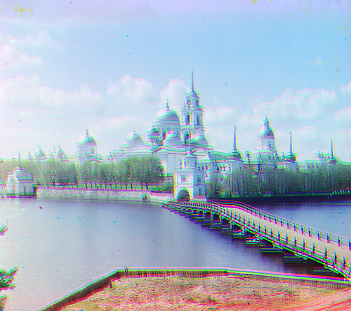

In [ ]:
im_color = np.zeros((311,351,3), dtype=np.uint8 )
im_color[:,:,0] = blue
im_color[:,:,1] = green
im_color[:,:,2] = red
cv2_imshow(im_color)

**Using the same SSD algorithm as before**

In [ ]:
alignRedtoBlue = ssdAlign(2)
alignGreentoBlue = ssdAlign(1)

(1, 2)
(-2, 2)


**The green channel has to be displaced by a vector of (1,2) and the blue channel has to be displaced by a vector of (-2,2)**

In [ ]:
red = np.roll(red,[1,2],axis = (0,1))
green = np.roll(green,[-2,2],axis = (0,1))

**Setting the final image matrix**

In [ ]:
im_color[:,:,0] = blue
im_color[:,:,1] = green
im_color[:,:,2] = red

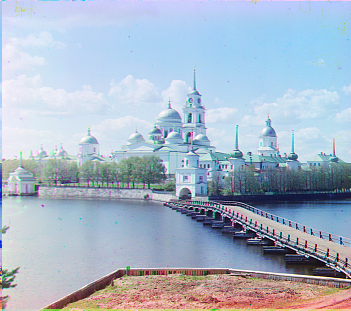

In [ ]:
cv2_imshow(im_color)

**As we can see the image quality is a lot clearer. Now, trying the same with NCC**

In [ ]:
blue = img2[0:331,:]
green = img2[332:663,:]
red = img2[663:994,:]

In [ ]:
blue = blue[:-20,:]
green = green[10:-10,:]
red = red[17:-3,:]

In [ ]:
im_color_ncc = np.zeros((311,351,3), dtype=np.uint8 )
im_color_ncc[:,:,0] = blue
im_color_ncc[:,:,1] = green
im_color_ncc[:,:,2] = red

**Using the same NCC algorithm as the last time**

In [ ]:
alignGreentoBlue = nccAlign(1)
alignRedtoBlue = nccAlign(2)

(-2, 2)
(1, 2)


***In this case the displacement values are the same for NCC as compared to SSD, which really tells us that this is the best answer we can get***

In [ ]:
red = np.roll(red,[1,2],axis = (0,1))
green = np.roll(green,[-2,2],axis = (0,1))

In [ ]:
im_color_ncc[:,:,1] = green
im_color_ncc[:,:,2] = red

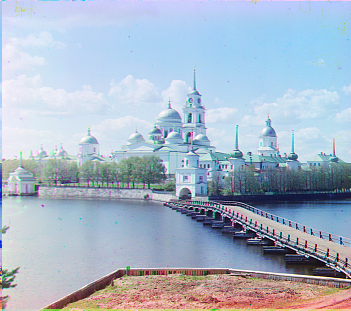

In [ ]:
cv2_imshow(im_color_ncc)

**Hence this is the best image possible**